In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r'C:\Users\jpreg\Desktop\Agenda-Guia\2021.1\Bibliografia 2021.1\IA\Arquivos-20210826T114338Z-001\Arquivos\Ibovespa.csv')
df.head(10)

,Ano,Quinzena,Cotacao,Inflacao,Volatilidade,Volume
0,2009,6,2.90,4.23,4.50,2040
1,2008,28,1.80,3.40,3.20,2455
2,2007,16,1.90,3.00,3.20,1532
3,2016,27,2.37,2.77,3.97,2482
4,2006,26,3.10,4.18,3.90,3600
5,2009,20,3.20,3.98,5.00,4459
6,2006,27,3.50,4.28,4.90,3955
7,2010,5,3.10,4.55,3.80,3556
8,2013,23,3.28,5.03,4.38,3613
9,2010,3,2.60,3.25,3.80,2756


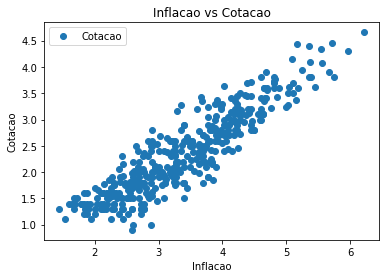

In [3]:
df.plot(x='Inflacao', y='Cotacao', style='o')  
plt.title('Inflacao vs Cotacao')  
plt.xlabel('Inflacao')  
plt.ylabel('Cotacao')  
plt.show()

In [4]:
df = df.drop(['Ano','Quinzena'], axis=1)
X = df.drop('Cotacao', axis=1)
y = df[['Cotacao']]
X1 = X.drop('Volume', axis=1)
X1 = X1. drop('Volatilidade', axis=1)

In [5]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) 

In [6]:
from sklearn.linear_model import LinearRegression 
regressao = LinearRegression() 
regressao.fit(x_train, y_train)

print(regressao.intercept_) 
print(regressao.coef_) 


[-0.18259269]
[[0.74900624]]


In [7]:
df.to_csv(r'C:\Users\jpreg\Desktop\Agenda-Guia\2021.1\Bibliografia 2021.1\IA\Arquivos-20210826T114338Z-001\Arquivos\IbovespaSalvo.csv')


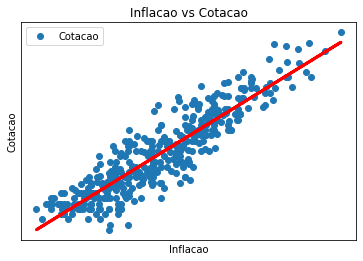

In [8]:
y_pred = regressao.predict(X[['Inflacao']])

df.plot(x='Inflacao', y='Cotacao', style='o')  
plt.title('Inflacao vs Cotacao')  
plt.xlabel('Inflacao')  
plt.ylabel('Cotacao')  

plt.plot(X[['Inflacao']], y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
x_uso = [[0.0]]
y_uso = regressao.predict(x_uso)
print(x_uso,y_uso)

[[0.0]] [[-0.18259269]]


In [10]:
x_uso = [[6.0]]
y_uso = regressao.predict(x_uso)
print(x_uso,y_uso)

[[6.0]] [[4.31144473]]


In [11]:
y_pred_test = regressao.predict(x_test)
df2 = pd.DataFrame({'Atual': y_test.values.flat, 'Previsto': y_pred_test.flat})  
df2

,Atual,Previsto
0,2.70,2.948253
1,2.40,2.723552
2,3.23,2.648651
3,2.45,3.000684
4,2.50,1.974545
...,...,...
75,2.20,1.989525
76,2.08,2.236697
77,3.60,3.412637
78,2.42,2.678611


In [16]:
import joblib

# Salvar o modelo no diretorio corrente
regressao_salva = "regressao.pkl"  
joblib.dump(regressao, regressao_salva)

# Ler do Arquivo salvo
regressao3 = joblib.load(regressao_salva)

In [17]:
# Calculo da Acurácia e as predições
score = regressao3.score(x_test, y_test)  
print("Acuracia: {0:.2f} %".format(100 * score))  
y_pred2 = regressao3.predict(x_test) 
print (x_test)
print (y_pred2)

Acuracia: 80.38 %
     Inflacao
65       4.18
132      3.88
74       3.78
78       4.25
37       2.88
..        ...
269      2.90
235      3.23
145      4.80
196      3.82
124      3.53

[80 rows x 1 columns]
[[2.94825338]
 [2.72355151]
 [2.64865088]
 [3.00068382]
 [1.97454527]
 [3.262836  ]
 [1.75733346]
 [2.85088257]
 [3.28530619]
 [1.0532676 ]
 [1.41279059]
 [1.46522103]
 [2.81343226]
 [2.46139932]
 [2.6861012 ]
 [2.46888939]
 [2.43892914]
 [1.60004215]
 [2.76849188]
 [2.12434652]
 [2.53629995]
 [2.81343226]
 [3.11303475]
 [2.55877014]
 [1.54012165]
 [1.22553903]
 [1.9895254 ]
 [1.54012165]
 [1.50267134]
 [3.00068382]
 [1.76482352]
 [1.91462477]
 [2.40147883]
 [1.83972415]
 [1.18808872]
 [3.15048506]
 [1.82474402]
 [1.41279059]
 [2.02697571]
 [2.57375026]
 [3.023154  ]
 [2.36402851]
 [1.89964465]
 [1.93709496]
 [1.33788997]
 [2.23669745]
 [2.73853163]
 [2.64865088]
 [3.00068382]
 [2.79845213]
 [2.02697571]
 [2.12434652]
 [1.9895254 ]
 [3.42012731]
 [3.023154  ]
 [3.30777637]
 [3.038

In [18]:
from sklearn import metrics  
print('Erro Medio Absoluto:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Erro Medio Quadratico:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Erro Medio Raiz Quadratica:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) 

Erro Medio Absoluto: 0.2525422302115111
Erro Medio Quadratico: 0.10022309804428113
Erro Medio Raiz Quadratica: 0.31658031847270784


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0) 

regressao2 = LinearRegression()
regressao2.fit(x_train[['Inflacao', 'Volatilidade', 'Volume']], y_train) 
y_pred_test2 = regressao2.predict(x_test[['Inflacao', 'Volatilidade', 'Volume']])

print('Erro Medio Absoluto:', metrics.mean_absolute_error(y_test, y_pred_test2))  
print('Erro Medio Quadratico:', metrics.mean_squared_error(y_test, y_pred_test2))  
print('Erro Medio Raiz Quadratica:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test2)))

Erro Medio Absoluto: 0.17684303958402503
Erro Medio Quadratico: 0.04788906137673575
Erro Medio Raiz Quadratica: 0.21883569493283253


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

0.6921924922992171


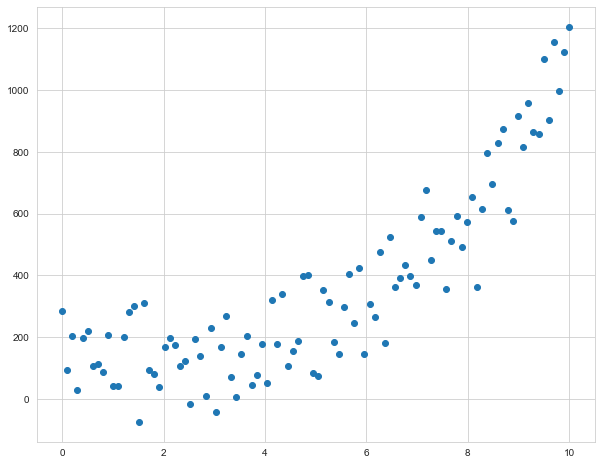

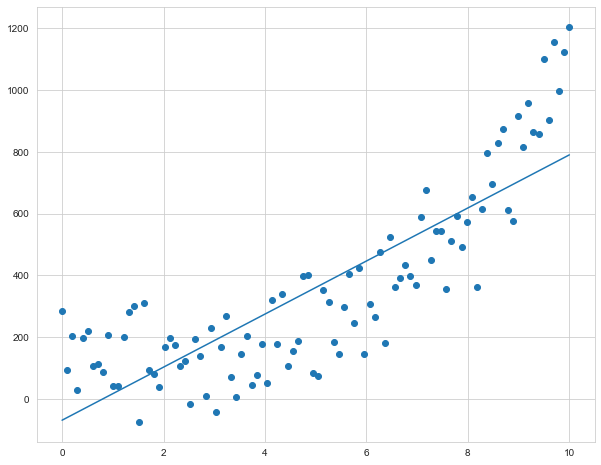

In [21]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
model_pred = lin_reg.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

0.8725693341929421


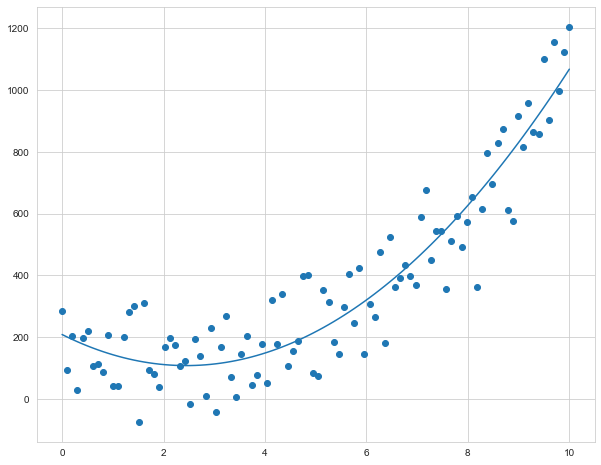

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))